In [1]:
import numpy as np
import pandas as pd

# Let's start with Spam Data

In [2]:
SpamData = pd.read_csv('https://raw.githubusercontent.com/ga-students/SF-DAT-20/master/Data/spambase.csv')

In [3]:
AllVariables = SpamData.columns.values

In [4]:
X = SpamData[AllVariables]
del X['is_spam']
X.shape  #You have 4601 inputs and 57 variables

(4601, 57)

In [6]:
from sklearn.decomposition import PCA
clf = PCA(.99)  #you enough principle components to capture 99% of variability
X_trans = clf.fit_transform(X)
X_trans.shape #You have 4601 inputs and only 2 components!

(4601, 2)

In [7]:
y = SpamData['is_spam']

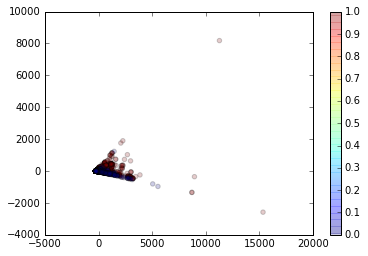

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X_trans[:, 0], X_trans[:, 1],c=y, alpha=0.2)
plt.colorbar();

In [9]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(X_trans,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:

from sklearn.cross_validation import cross_val_score
print(cross_val_score(lm,X_trans,y,cv=10).mean()) 
MisClassificationError = 1 - (cross_val_score(lm,X_trans,y,cv=10).mean())
print(MisClassificationError)  #our misclassification Error is 27 percent!

0.725943529979
0.274056470021


In [11]:
misclass =[]
for i in range(1,40):
    clf = PCA(i)  #i principle components
    X_trans = clf.fit_transform(X)
    MisClassificationError = 1 - (cross_val_score(lm,X_trans,y,cv=10).mean())
    misclass.append(MisClassificationError)
print min(misclass)    

0.0858778509884


# Let's work with Digit data

In [12]:
from sklearn.datasets import load_digits

In [13]:
digits = load_digits()
X = digits.data
y = digits.target

In [14]:
print digits.DESCR

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [15]:
print X.shape
print y


(1797, 64)
[0 1 2 ..., 8 9 8]


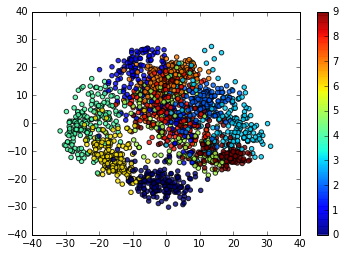

In [16]:
pca = PCA(2)
X_pc_handwriting = pca.fit_transform(X)
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X_pc_handwriting[:, 0], X_pc_handwriting[:, 1],c=y, alpha=0.8)
plt.colorbar();

In [17]:
from sklearn import neighbors, metrics
from sklearn.cross_validation import cross_val_score
misclass = []
for i in range(1,40):
    clf = PCA(i)
    X_trans = clf.fit_transform(X)
    knn = neighbors.KNeighborsClassifier(n_neighbors=1, weights='uniform')
    knn.fit(X_trans,y)
    MisClassificationError = 1 - (cross_val_score(knn,X_trans,y,cv=10).mean())
    misclass.append(MisClassificationError)
print min(misclass)
# We can achieve CV error rate of 1.99%! This is awesome! 

0.0199900610085


[  1.48905936e-01   1.36187712e-01   1.17945938e-01   8.40997942e-02
   5.78241466e-02   4.91691032e-02   4.31598701e-02   3.66137258e-02
   3.35324810e-02   3.07880621e-02   2.37234084e-02   2.27269657e-02
   1.82186331e-02   1.77385494e-02   1.46710109e-02   1.40971560e-02
   1.31858920e-02   1.24813782e-02   1.01771796e-02   9.05617439e-03
   8.89538461e-03   7.97123157e-03   7.67493255e-03   7.22903569e-03
   6.95888851e-03   5.96081458e-03   5.75614688e-03   5.15157582e-03
   4.89539777e-03   4.28887968e-03   3.73606048e-03   3.53274223e-03
   3.36683986e-03   3.28029851e-03   3.08320884e-03   2.93778629e-03
   2.56588609e-03   2.27742397e-03   2.22277922e-03   2.11430393e-03
   1.89909062e-03   1.58652907e-03   1.51159934e-03   1.40578764e-03
   1.16622290e-03   1.07492521e-03   9.64053065e-04   7.74630271e-04
   5.57211553e-04   4.04330693e-04   2.09916327e-04   8.24797098e-05
   5.25149980e-05   5.05243719e-05   3.29961363e-05   1.24365445e-05
   7.04827911e-06   3.01432139e-06

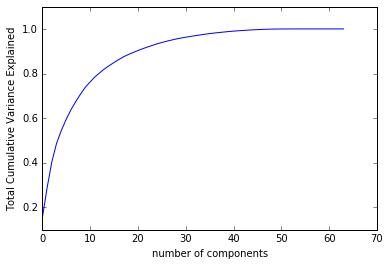

In [18]:
AllPCAs = PCA().fit(X)
print AllPCAs.explained_variance_ratio_
plt.xlabel('number of components')
plt.ylabel('Total Cumulative Variance Explained')
plt.plot(np.cumsum(AllPCAs.explained_variance_ratio_))

# Number of components is what you see in the graph +1 ! (we could easily solve this)

# Some cool demonstrations!

Acknowledgment: This work is done by Prof. Jake VanderPlas - Director of Research in Physical Sciences for Univesity of Washington's eScience institute.

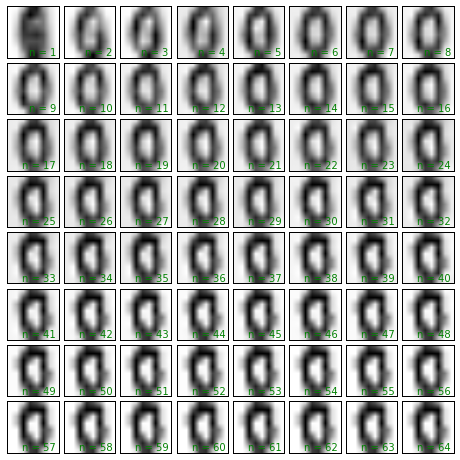

In [19]:
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    pca = PCA(i + 1).fit(X)
    im = pca.inverse_transform(pca.transform(X[20:21]))
    ax.imshow(im.reshape((8, 8)), cmap='binary')
    ax.text(0.95, 0.05, 'n = {0}'.format(i + 1), ha='right',
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

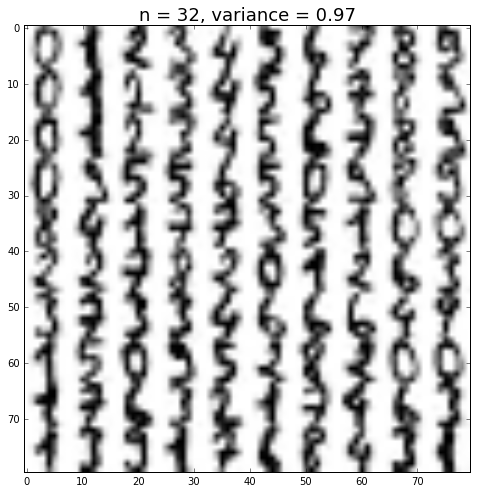

In [20]:
from IPython.html.widgets import interact

def plot_digits(n_components):
    plt.figure(figsize=(8, 8))
    nside = 10
    
    pca = PCA(n_components).fit(X)
    Xproj = pca.inverse_transform(pca.transform(X[:nside ** 2]))
    Xproj = np.reshape(Xproj, (nside, nside, 8, 8))
    total_var = pca.explained_variance_ratio_.sum()
    
    im = np.vstack([np.hstack([Xproj[i, j] for j in range(nside)])
                    for i in range(nside)])
    plt.imshow(im,cmap='Greys')
    plt.grid(False)
    plt.title("n = {0}, variance = {1:.2f}".format(n_components, total_var),
              size=18)
    plt.clim(0, 16)
    
interact(plot_digits, n_components=[1, 64], nside=[1, 8]);